##### 先导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

# 全局排除中文显示
font = {
    'family':'SimHei',
    'weight':'bold',
    'size':12
}

matplotlib.rc("font", **font)

# 添加%matplotlib inline → 只显示第一帧图像。
# 添加%matplotlib notebook → 正常显示动态图像和交互界面。
# %matplotlib notebook

### 读取数据，并查看数据的详情信息

In [2]:
data = pd.read_excel('ships.xlsx')
data.info()
data = data[['Ship_Name', 'Ship_Type', 'Beam', 'Depth', 'Displacement_Tonnage', 'Dwt', 'Draft', 'LBP', 'LOA']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ship_Name             5686 non-null   object 
 1   Beam                  5671 non-null   float64
 2   Depth                 5597 non-null   float64
 3   Displacement_Tonnage  5686 non-null   int64  
 4   Dwt                   4692 non-null   float64
 5   Draft                 5422 non-null   float64
 6   LBP                   5347 non-null   float64
 7   KTMH                  1130 non-null   float64
 8   LDT                   1542 non-null   float64
 9   LOA                   5485 non-null   float64
 10  Ship_Type             5686 non-null   object 
 11  Gt                    994 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 533.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 9 columns):
 #   Colu

##### 查看数据得知，数据列包括：船名字（Ship_Name），船宽（Beam），船深（Depth），排水量吨位（Displacement_Tonnage），载重吨位（Dwt），吃水（Draft），船长LBP（LBP），船舶尺度（KTMH），船舶最小载重吨（LDT），全长（LOA），船舶类型（Ship_Type），总吨（Gt）
##### 由于总吨（Gt），船舶尺度（KTMH），船舶最小载重吨（LDT）的数据缺失值较多,超过50%，所以对该列进行删除，不对该列进行数据分析

## 查看不同类型的船的数目。
#### 1:先将数据中的类型和船名字取出.
#### 2:再以类型进行分组.
#### 3:最后求每种船体类型的数目

##### 经查看结果得知，数据中类型general cargo carries和类型bulk carriers的船体较多
##### drilling ships , crane vessel , ddrilling rig semi submersible 类型的船体较为少见.

In [3]:
TYPE = data.loc[:,['Ship_Name','Ship_Type']].groupby('Ship_Type').count()
TYPE.columns = ['count']
print(TYPE)

                                count
Ship_Type                            
LNG tankers                        40
LPG tankers                       128
bulk carriers                    1134
bulk cement carriers               42
chemical carriers                 488
container carriers                533
crane vessel                       24
drilling rig jack up               57
drilling rig semi submersible      27
drilling ships                     20
general cargo carries            1581
oil carries                       786
passenger carriers                377
passenger ro-ro cargo carriers    289
ro-ro cargo carriers               75
vehicles carriers                  85


### 查看船长（LBP）与全长（LOA）之间的关系

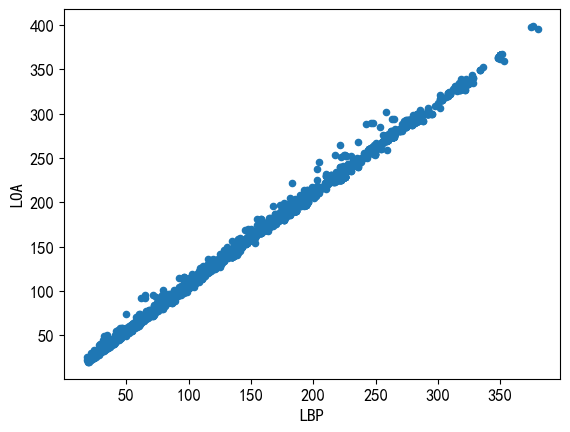

In [4]:
# 取出所有LBP和LOA同时不为空且不为0的数据
l = data[['LBP','LOA']].dropna()
l = l[l != 0]
l.plot.scatter(x='LBP',y='LOA')
plt.show()

##### 根据上图大致可以看出，对于船体的船长和全长来说，
##### 船长越长，全长也越长。

### 绘制三维作图：查看船宽，船深与各吨位和吃水之间的关系图

##### 1：查看船宽，船深和排水量吨位之间的关系图

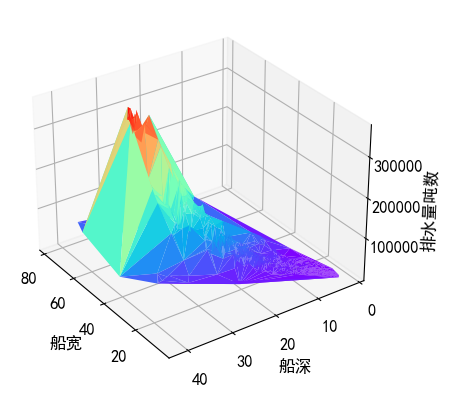

In [5]:
# 获取所有船宽，船深和排水量吨位同时不为零的数据

l = data[[ 'Beam', 'Depth', 'Displacement_Tonnage']].dropna()
l = l[(l['Displacement_Tonnage'] != 0)]

# 以船宽为x轴，船深为y轴，排水量吨位为z轴做三维图
fig0 = plt.figure()
ax = fig0.add_subplot(111, projection='3d')
ax.plot_trisurf(l['Beam'].to_list(), l['Depth'].to_list(), l['Displacement_Tonnage'].to_list(),cmap="rainbow")
ax.set_xlabel('船宽')
ax.set_ylabel('船深')
ax.set_zlabel('排水量吨数')
# elev=29, azim=45
ax.view_init(elev=30, azim=145)
plt.show()

##### 从图中可以看出，水位吨数并不是随着船深和船宽增大而增加。
##### 是有一个最佳的指数范围的。

##### 2：查看船宽，船深和载重吨位之间的关系图

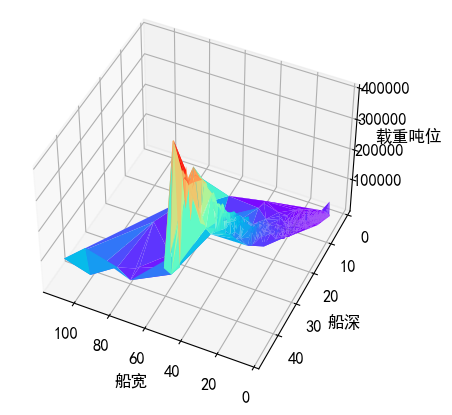

In [6]:
# 获取所有船宽，船深和载重吨位同时不为零的数据

l = data[[ 'Beam', 'Depth', 'Dwt']].dropna()
l = l[(l['Dwt'] != 0)]

# 以船宽为x轴，船深为y轴，载重吨位为z轴做三维图
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_trisurf(l['Beam'].to_list(), l['Depth'].to_list(), l['Dwt'].to_list(),cmap="rainbow")
ax.set_xlabel('船宽')
ax.set_ylabel('船深')
ax.set_zlabel('载重吨位')
ax.view_init(elev=45, azim=115)
plt.show()

##### 由上图也可以较为清楚的看出，载重吨位也不是随着船宽船深的增大而增大的，
##### 有一个最佳的范围

##### 3：查看船宽，船深和吃水之间的关系图

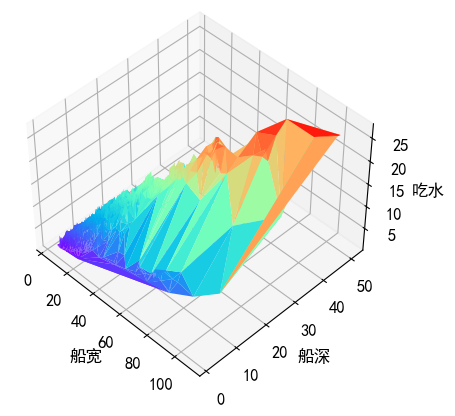

In [7]:
# 获取所有船宽，船深和吃水同时存在且不为零的船体数据

l = data[[ 'Beam', 'Depth', 'Draft']].dropna()
l = l[(l['Draft'] != 0)]

# 以船宽为x轴，船深为y轴，吃水为z轴做三维图
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_trisurf(l['Beam'].to_list(), l['Depth'].to_list(), l['Draft'].to_list(),cmap="rainbow")
ax.set_xlabel('船宽')
ax.set_ylabel('船深')
ax.set_zlabel('吃水')
# elev=45, azim=115
ax.view_init(elev=45, azim=-45)
plt.show()

##### 由图可以看出，船宽和船深的大小与吃水量有更为直接的关系，
##### 对于船宽和船深越大的数据，相应的吃水量也越大。

### 总结：在船体的数据中，当船宽和船深在一定的范围内时，排水量吨位，载重吨位，吃水体现出较大值。